In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl
api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 3788741
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g, load_360=True)
teams = list(df_events['team_name'].unique())
teams_id = list(df_events['team_id'].unique())

df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=teams_id[0])
df_actions = (
spadl
.add_names(df_actions)
.merge(api.teams(game_id=g))
.merge(api.players(game_id=g))
)
df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

    nice_time    player_name          type_name    result_name    team_name
--  -----------  -------------------  -----------  -------------  -----------
 0  65m16s       Lorenzo Insigne      dribble      success        Italy
 1  65m21s       Lorenzo Insigne      pass         success        Italy
 2  65m23s       Nicolò Barella       dribble      success        Italy
 3  65m25s       Nicolò Barella       pass         success        Italy
 4  65m26s       Domenico Berardi     dribble      success        Italy
 5  65m27s       Domenico Berardi     pass         success        Italy
 6  65m29s       Leonardo Spinazzola  dribble      success        Italy
 7  65m31s       Leonardo Spinazzola  shot         fail           Italy
 8  65m32s       Uğurcan Çakır        keeper_save  fail           Turkey
 9  65m33s       Ciro Immobile        shot         success        Italy


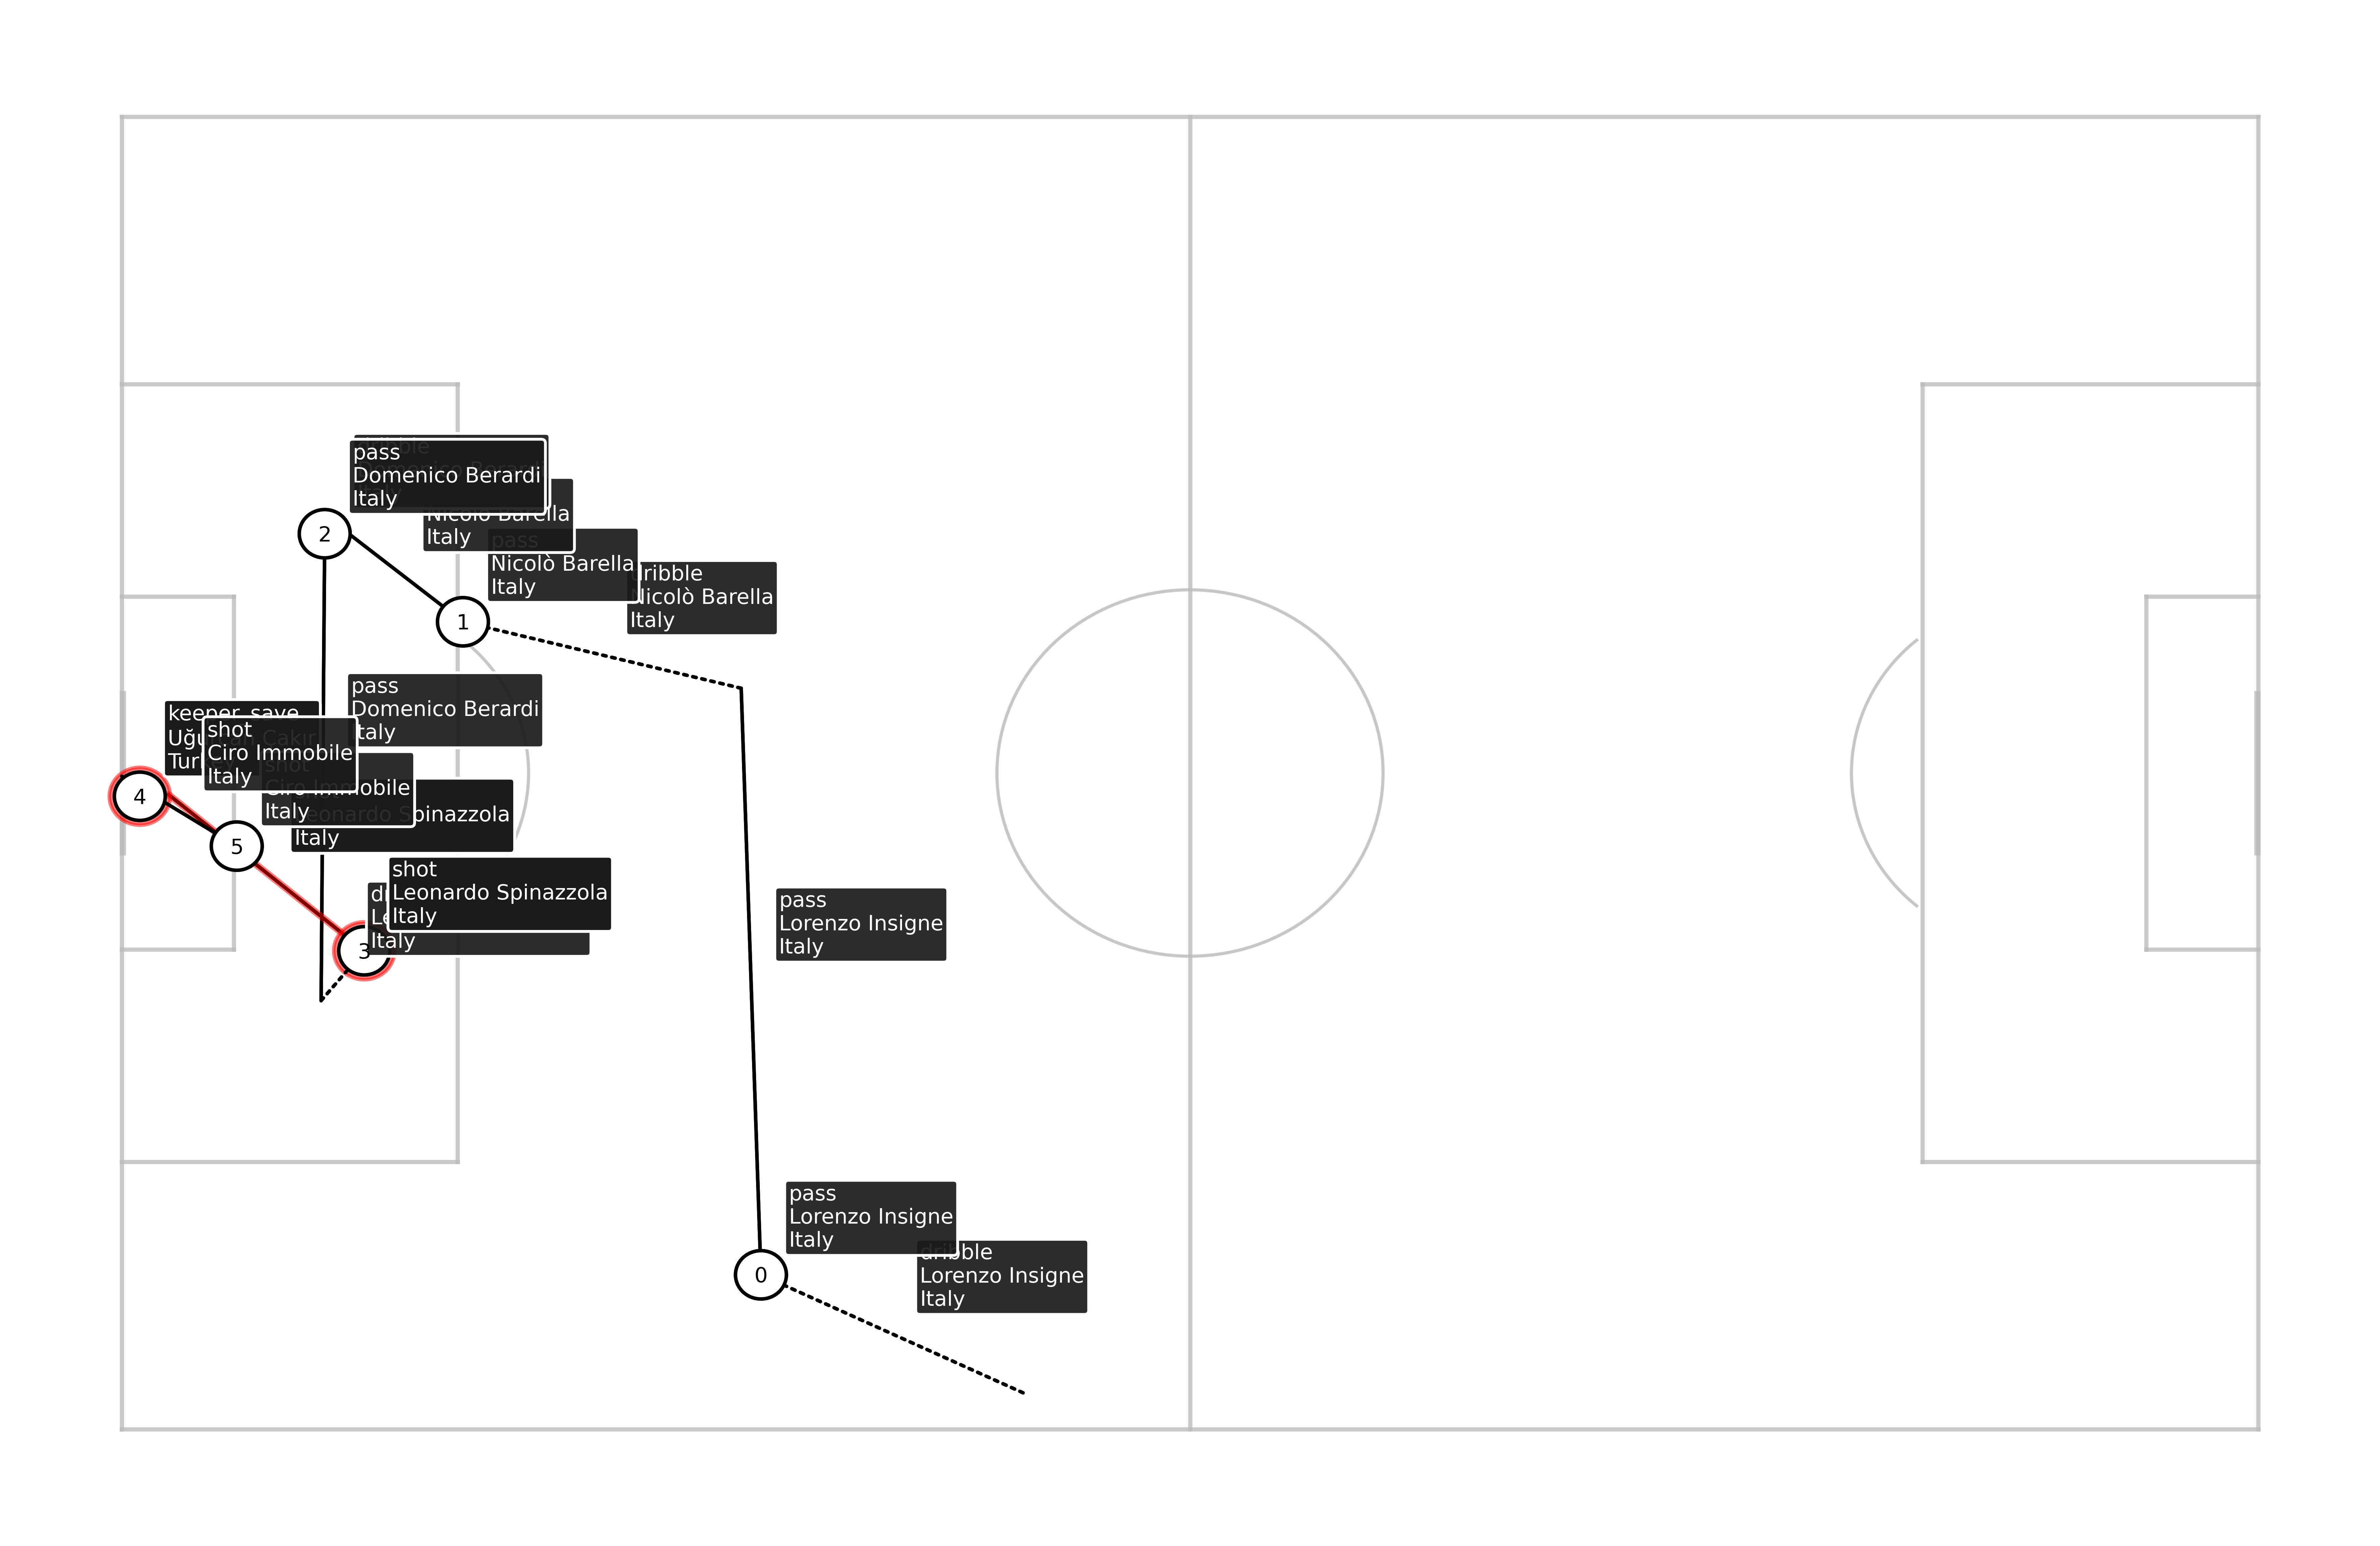

    nice_time    player_name       type_name     result_name    team_name
--  -----------  ----------------  ------------  -------------  -----------
 0  78m22s       Uğurcan Çakır     dribble       success        Turkey
 1  78m23s       Uğurcan Çakır     pass          fail           Turkey
 2  78m24s       Domenico Berardi  interception  success        Italy
 3  78m24s       Domenico Berardi  dribble       success        Italy
 4  78m26s       Domenico Berardi  pass          success        Italy
 5  78m27s       Nicolò Barella    dribble       success        Italy
 6  78m27s       Nicolò Barella    pass          success        Italy
 7  78m28s       Ciro Immobile     dribble       success        Italy
 8  78m29s       Ciro Immobile     pass          success        Italy
 9  78m30s       Lorenzo Insigne   shot          success        Italy


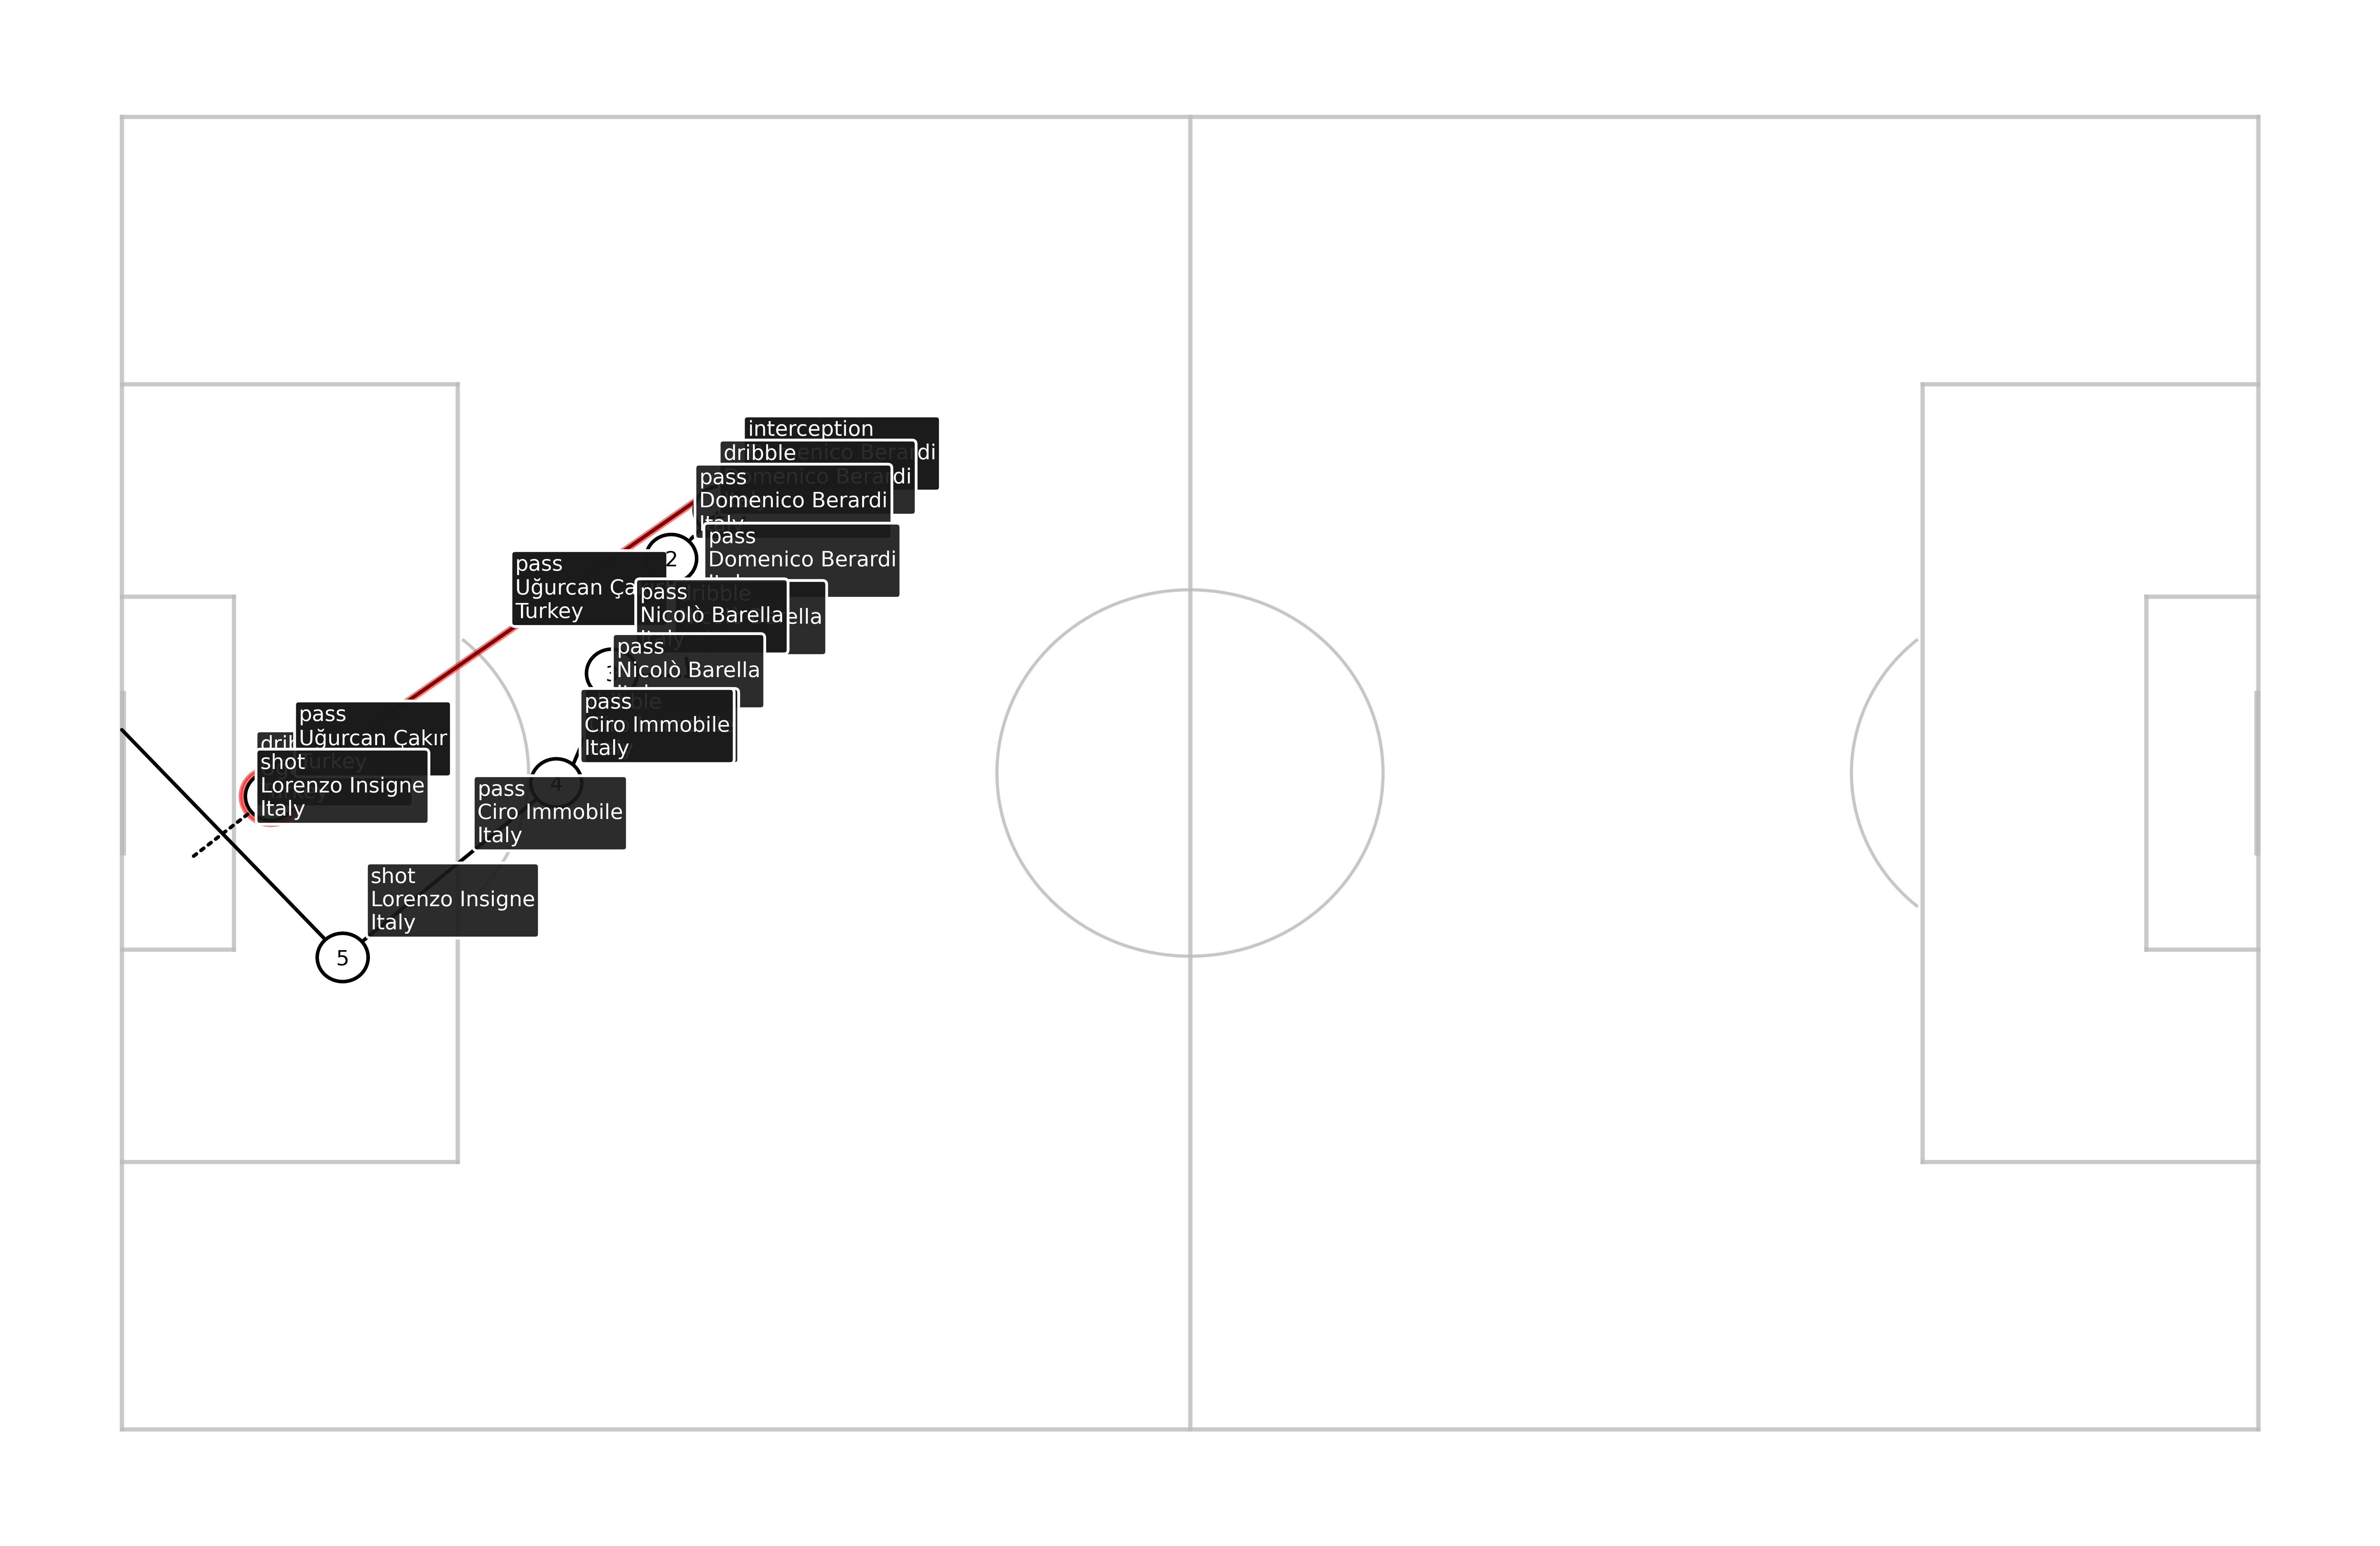

In [7]:
import statsbombplot as sbp

sbp.actions.draw_goals(df_actions)